# Импорт

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [11]:
!gdown --id 1OPngxMvLVx7krUuLR6YX9TXz0iILah6W
df = pd.read_csv('./report.csv')
df.head(5)

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1OPngxMvLVx7krUuLR6YX9TXz0iILah6W
To: /content/report.csv
100% 264k/264k [00:00<00:00, 114MB/s]


,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10


# Чистка данных

Уберите ячейки с nan. В таблице это строчки с "подведением итогов" каждого года и неполная информация за 2015 год

Также в колонках "per capita" значения оказались домноженными на 10^5, так что это тоже следует исправить

In [12]:
df = df.dropna()

In [13]:
df[df.filter(like='percapita').columns] /=1e5

In [14]:
df

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,0.008325,0.000105,0.000632,0.004727,0.002861
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,0.002472,0.000045,0.000249,0.001174,0.001005
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,0.016374,0.000377,0.000903,0.007171,0.007923
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,0.005238,0.000060,0.000377,0.003335,0.001466
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,0.004045,0.000110,0.000633,0.001541,0.001761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2754,2014,AZ01003,"Tucson, AZ",527328.0,3443.0,35.0,399.0,2021.0,988.0,12.0,0.006529,0.000066,0.000757,0.003832,0.001874
2755,2014,OK07205,"Tulsa, OK",399556.0,3217.0,46.0,313.0,1938.0,920.0,12.0,0.008051,0.000115,0.000783,0.004850,0.002303
2756,2014,VA12800,"Virginia Beach, VA",451102.0,667.0,17.0,115.0,285.0,250.0,12.0,0.001479,0.000038,0.000255,0.000632,0.000554
2757,2014,DCMPD00,"Washington, DC",658893.0,7810.0,105.0,470.0,4004.0,3231.0,12.0,0.011853,0.000159,0.000713,0.006077,0.004904


# Обзор данных

Посмотрите на статистики по датасету

In [15]:
df.describe()

,report_year,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
count,2688.000000,2.688000e+03,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000
mean,1994.565104,7.931257e+05,9004.445312,125.644345,415.340774,4422.396949,4041.063244,11.886533,0.011092,0.000156,0.000594,0.005697,0.004645
std,11.566712,1.010316e+06,16007.228845,205.001170,480.924802,7028.064975,8744.855463,1.020882,0.006817,0.000124,0.000321,0.003714,0.003427
min,1975.000000,1.007630e+05,154.000000,1.000000,15.000000,15.000000,83.000000,0.000000,0.000165,0.000002,0.000016,0.000016,0.000115
25%,1985.000000,3.771285e+05,2973.250000,32.000000,176.000000,1464.250000,1035.000000,12.000000,0.006381,0.000071,0.000358,0.003202,0.002135
50%,1995.000000,5.341290e+05,5088.500000,63.000000,289.000000,2598.000000,1964.000000,12.000000,0.009689,0.000123,0.000560,0.004910,0.003789
75%,2005.000000,8.119650e+05,8829.250000,127.250000,464.000000,4568.000000,3649.250000,12.000000,0.014271,0.000205,0.000778,0.007302,0.006171
max,2014.000000,8.473938e+06,174542.000000,2245.000000,3899.000000,71030.000000,107475.000000,12.000000,0.043528,0.000947,0.001993,0.023682,0.023375


Такое описание данных выглядит неинформативно. Для многих столбцов оно вообще не имеет смысла. Более интересно посмотреть статистику, сгруппированную по годам/местам.

In [17]:
df.groupby('report_year').describe()

population                                                    \
                 count           mean           std       min        25%   
report_year                                                                
1975              67.0  706629.597015  9.851391e+05  112478.0  340629.00   
1976              67.0  706297.985075  9.967182e+05  100763.0  339810.50   
1977              67.0  706907.134328  9.918106e+05  112994.0  336488.50   
1978              67.0  700319.208955  9.653005e+05  118393.0  328908.00   
1979              67.0  700611.910448  9.517507e+05  115498.0  340492.50   
1980              67.0  703036.104478  9.411166e+05  127811.0  337219.50   
1981              67.0  712602.283582  9.485849e+05  135812.0  352235.00   
1982              67.0  721477.388060  9.537942e+05  139152.0  358180.50   
1983              67.0  729863.194030  9.566078e+05  142678.0  362041.50   
1984              67.0  732164.641791  9.624340e+05  140541.0  362810.50   
1985              67.0  734202.014925  9.631975e+05  142025.0  362489.00   
1986              67.0  741453.000000  9.658681e+05  145882.0  366317.50   
1987              67.0  750025.910448  9.783812e+05  150250.0  370773.00   
1988              65.0  766636.769231  9.987840e+05  155673.0  377783.00   
1989              67.0  757909.208955  9.883983e+05  154304.0  371299.00   
1990              67.0  754743.119403  9.759849e+05  159936.0  369622.00   
1991              67.0  765752.313433  9.825030e+05  164313.0  375180.50   
1992              67.0  773236.567164  9.876626e+05  168304.0  380223.50   
1993              67.0  770789.447761  9.803480e+05  170380.0  378036.50   
1994              67.0  779357.462687  9.800600e+05  174827.0  380971.00   
1995              67.0  774467.582090  9.727768e+05  175765.0  374909.00   
1996              67.0  782586.582090  9.763601e+05  180180.0  377907.00   
1997              66.0  795762.530303  9.827266e+05  185553.0  382209.50   
1998              66.0  801250.045455  9.882978e+05  178579.0  385090.00   
1999              67.0  801548.059701  9.939032e+05  177010.0  378061.50   
2000              67.0  834526.417910  1.058652e+06  181743.0  397929.50   
2001              67.0  845617.791045  1.063976e+06  184723.0  408467.00   
2002              67.0  857097.328358  1.074216e+06  188504.0  417854.00   
2003              68.0  853781.647059  1.067364e+06  184022.0  425033.00   
2004              68.0  854325.088235  1.067901e+06  182768.0  424076.75   
2005              68.0  858184.926471  1.069463e+06  184627.0  426031.50   
2006              68.0  863883.279412  1.074908e+06  183901.0  427557.25   
2007              68.0  861090.661765  1.081808e+06  178449.0  426420.50   
2008              68.0  875858.676471  1.094303e+06  180514.0  432024.00   
2009              68.0  888017.897059  1.101183e+06  180724.0  426729.75   
2010              68.0  870930.014706  1.068921e+06  186440.0  402783.25   
2011              68.0  879692.367647  1.075178e+06  190038.0  407985.75   
2012              68.0  889401.176471  1.084239e+06  192465.0  417059.25   
2013              68.0  898414.970588  1.096367e+06  190246.0  423405.50   
2014              68.0  909241.279412  1.106299e+06  192368.0  434271.25   

                                            violent_crimes                ...  \
                  50%        75%        max          count          mean  ...   
report_year                                                               ...   
1975         490584.0  669011.50  7422506.0           67.0   7522.492537  ...   
1976         488012.0  658758.50  7530493.0           67.0   7144.791045  ...   
1977         492055.0  671887.50  7481613.0           67.0   7053.552239  ...   
1978         485547.0  671755.50  7242886.0           67.0   7318.626866  ...   
1979         486407.0  668374.50  7109420.0           67.0   8109.656716  ...   
1980         452025.0  686451.50  7035348.0           67.0   9139.074627  ...   
1981         4

In [18]:
df.groupby('agency_jurisdiction').describe().drop('report_year',axis=1)

population                                       \
                         count        mean            std       min   
agency_jurisdiction                                                   
Albuquerque, NM           40.0  420075.050   82825.246209  286238.0   
Arlington, TX             40.0  275656.225   89682.236450  107470.0   
Atlanta, GA               40.0  438862.475   33297.058070  394017.0   
Aurora, CO                40.0  242877.800   67150.746976  116656.0   
Austin, TX                40.0  550553.350  174938.298772  284908.0   
...                        ...         ...            ...       ...   
Tucson, AZ                40.0  439971.825   78183.996680  306500.0   
Tulsa, OK                 40.0  378411.525   14854.862750  343258.0   
Virginia Beach, VA        40.0  376337.700   81582.795077  216176.0   
Washington, DC            40.0  604875.900   47175.387454  519000.0   
Wichita, KS               40.0  320509.425   40061.948880  256455.0   

                                                              violent_crimes  \
                           25%       50%        75%       max          count   
agency_jurisdiction                                                            
Albuquerque, NM      356879.75  418315.5  481963.25  558874.0           40.0   
Arlington, TX        212067.00  289536.0  362072.50  382976.0           40.0   
Atlanta, GA          419120.75  430854.5  446371.50  552901.0           40.0   
Aurora, CO           196314.50  254385.5  294213.25  350948.0           40.0   
Austin, TX           401161.00  517683.5  687592.75  903924.0           40.0   
...                        ...       ...        ...       ...            ...   
Tucson, AZ           373946.00  445691.5  520708.75  547981.0           40.0   
Tulsa, OK            370541.50  381554.0  389626.50  399556.0           40.0   
Virginia Beach, VA   307107.50  426364.0  438494.75  451102.0           40.0   
Washington, DC       571591.00  602861.5  631330.75  716000.0           40.0   
Wichita, KS          287396.00  313151.5  356137.00  387493.0           40.0   

                                ... assaults_percapita            \
                          mean  ...                75%       max   
agency_jurisdiction             ...                                
Albuquerque, NM       4394.400  ...           0.007981  0.011871   
Arlington, TX         1658.375  ...           0.004313  0.006472   
Atlanta, GA          10596.675  ...           0.017948  0.023682   
Aurora, CO            1898.675  ...           0.007800  0.014322   
Austin, TX            2802.850  ...           0.002810  0.004507   
...                        ...  ...                ...       ...   
Tucson, AZ            3721.125  ...           0.006127  0.008618   
Tulsa, OK             3795.200  ...           0.008493  0.009202   
Virginia Beach, VA     835.400  ...           0.000967  0.001170   
Washington, DC       10646.325  ...           0.009241  0.015576   
Wichita, KS           2241.475  ...           0.005501  0.007091   

                    robberies_percapita                                \
                                  count      mean       std       min   
agency_jurisdiction                                                     
Albuquerque, NM                    40.0  0.002926  0.000695  0.001722   
Arlington, TX                      40.0  0.001727  0.000507  0.000752   
Atlanta, GA                        40.0  0.009759  0.003264  0.004929   
Aurora, CO                         40.0  0.001945  0.000444  0.001180   
Austin, TX                         40.0  0.002018  0.000568  0.000888   
...                                 ...       ...       ...       ...   
Tucson, AZ                         40.0  0.002429  0.000447  0.001625   
Tulsa, OK                          40.0  0.002551  0.000646  0.001122   
Virginia Beach, VA                 40.0  0.001004  0.000248  0.000554   
Washington, DC                     40.0  0.009064  0.002976  0.004904   
Wi

Сделайте вывод от тендециях и запишите тут ваш инсайд

In [303]:
# Я бы сделал вывод, но тут как-то сложно прочитать. Слишком много столбцов с информацией :C

# Более детальный анализ

## Изменение уровня преступности по годам

Сперва, мне захотелось посмотреть на то как изменяются частоты различных преступлений. Ожидания - графики частот всех видов преступлений по времени будут иметь примерно одинаковые пики/падения.
Возьмём таблицу количеств происшествий по годам и перезапишем столбцы происшествий на душу населения.

In [56]:
df.reset_index(drop=True,inplace=True)
incident_columns = df.filter(like="percapita")
incident_columns = incident_columns.join(df['report_year'],how='left')
incident_columns

,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,report_year
0,0.008325,0.000105,0.000632,0.004727,0.002861,1975
1,0.002472,0.000045,0.000249,0.001174,0.001005,1975
2,0.016374,0.000377,0.000903,0.007171,0.007923,1975
3,0.005238,0.000060,0.000377,0.003335,0.001466,1975
4,0.004045,0.000110,0.000633,0.001541,0.001761,1975
...,...,...,...,...,...,...
2683,0.006529,0.000066,0.000757,0.003832,0.001874,2014
2684,0.008051,0.000115,0.000783,0.004850,0.002303,2014
2685,0.001479,0.000038,0.000255,0.000632,0.000554,2014
2686,0.011853,0.000159,0.000713,0.006077,0.004904,2014


Теперь мы получили таблицу, в которой число преступлений на душу населения за год расчитано правильно. Посмотрим на графики частот различных преступлений.

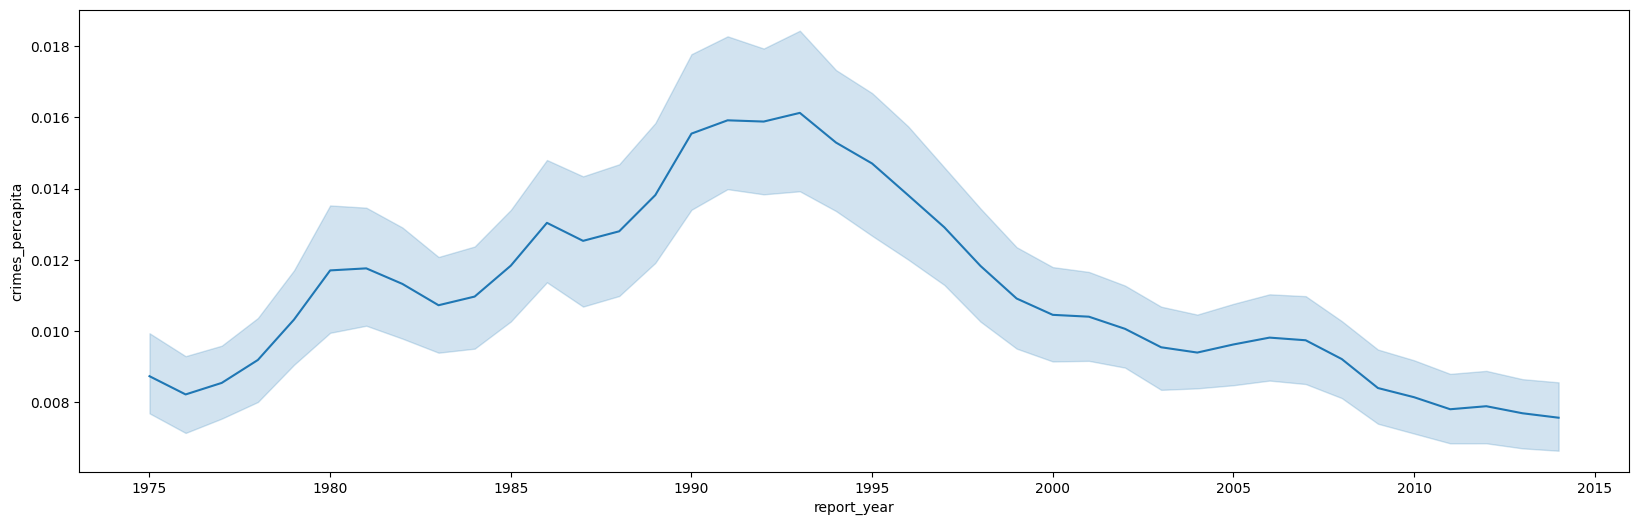

In [65]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='report_year', y='crimes_percapita', data=incident_columns)
plt.show()

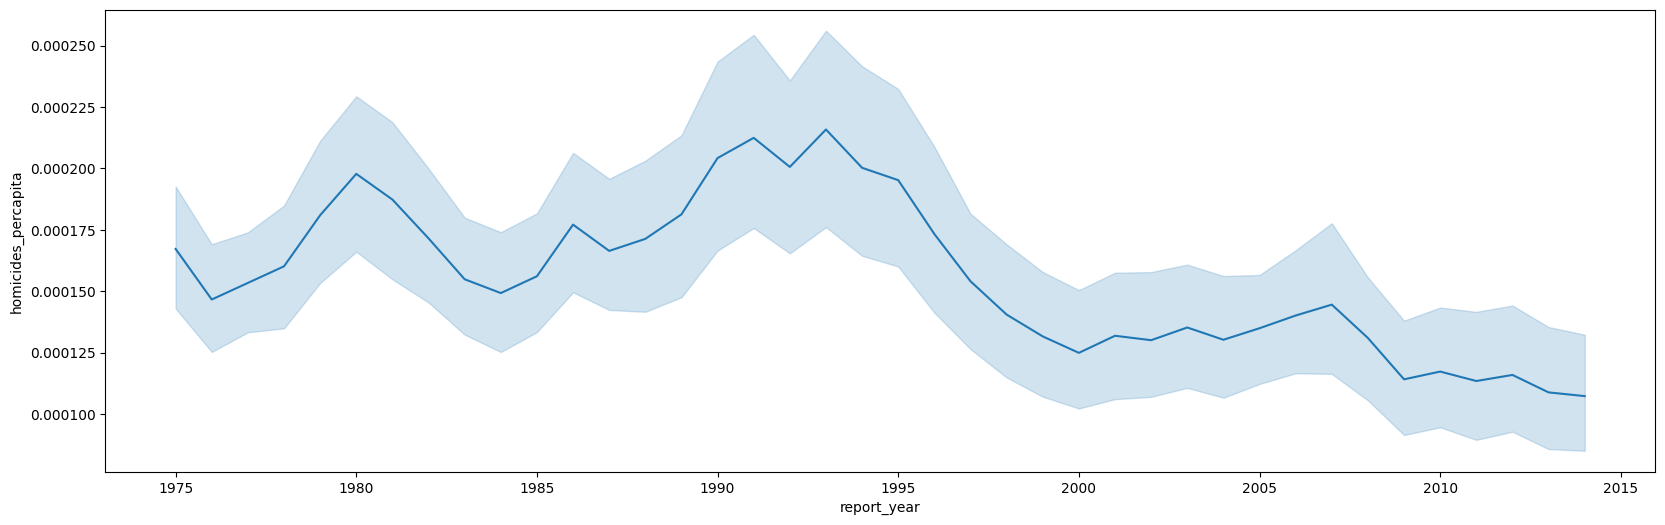

In [66]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='report_year', y='homicides_percapita', data=incident_columns)
plt.show()

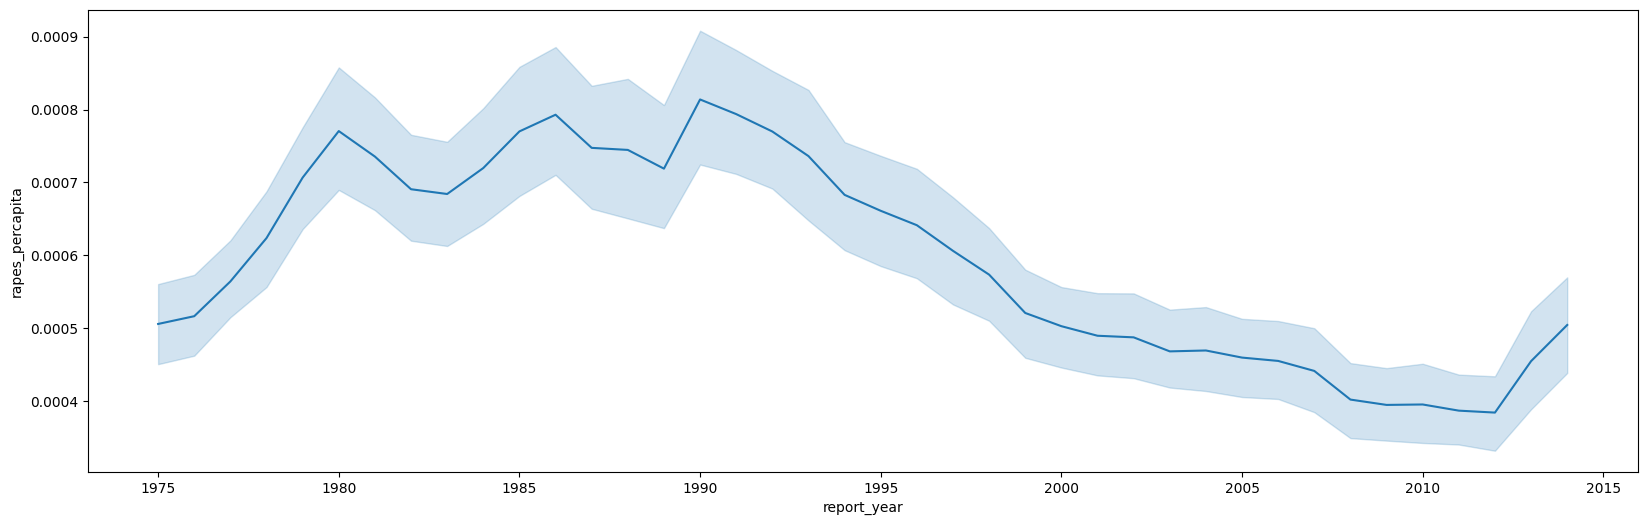

In [67]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='report_year', y='rapes_percapita', data=incident_columns)
plt.show()

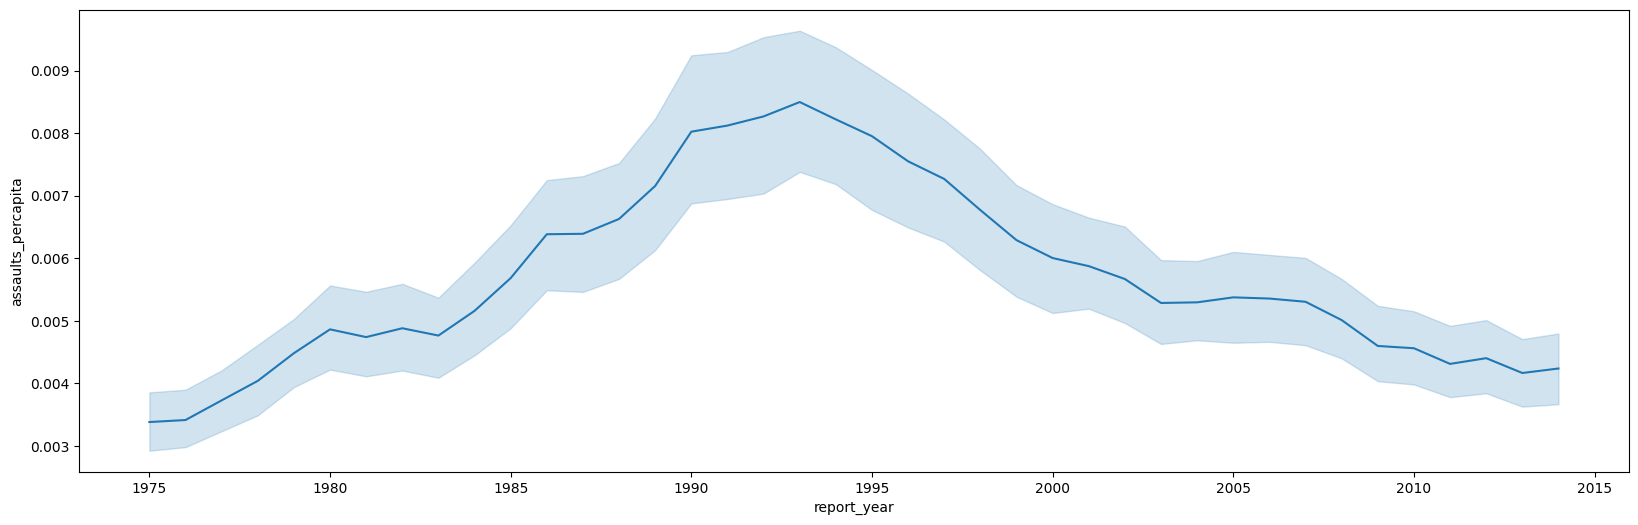

In [68]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='report_year', y='assaults_percapita', data=incident_columns)
plt.show()

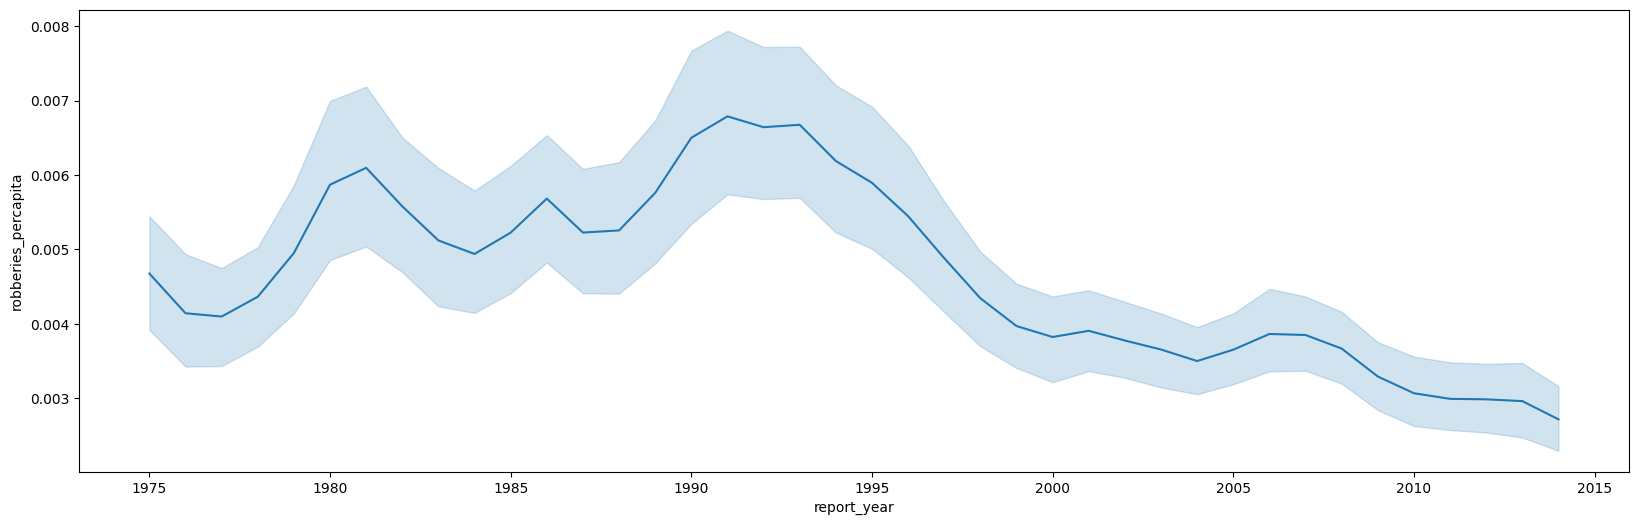

In [69]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='report_year', y='robberies_percapita', data=incident_columns)
plt.show()

Сделайте вывод о скачках преступности за всее время. Есть ли для всех видов схожие пики? С чем можно связать в экономическом смысле?

Пик убийств, изнасилований, нападений и грабежей приходит на 91-93 года. После этого периода наблюдается спад данных видов преступлений к 2015. Только количество преступлений связанных с изнасилованием в 2012 начинает подниматься. В общем, статистика криминала имеет такой же пик, как и рассматриваемые виды преступлений: 91-93 наибольшее количество. После данного периода, популярность криминала падает. Вряд ли развал СССР повлиял на преступность в США, ибо в в 90-ых экономических проблем в США не было. На уме лишь ипотечный кризис в 2007-2008 и великая депрессия.

## Зависимость уровня преступности от численности населения территориальных субъектов

Если мы предполагаем, что преступления встречаются с примерно одинаковой частотой, то ожидаем увидеть линейную зависимость количества преступлений от населенности города.

Сперва я предлагаю посмотреть, как тенденция из предыдущего графика выполняется для городов с наибольшим и наименьшим числом жителей.

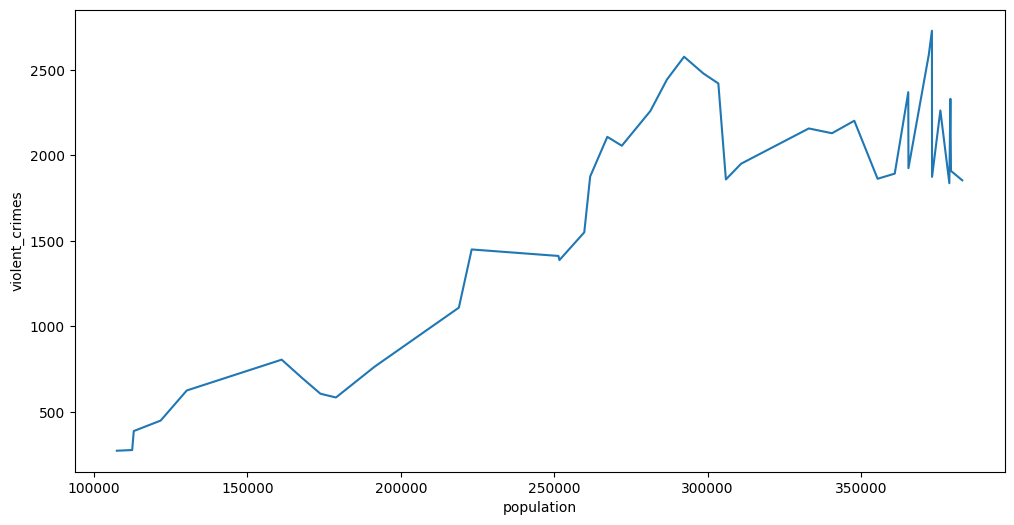

In [162]:
min = df[df['report_year']==1975]['population'].min()
smallest_town = df[df['population']==min].agency_jurisdiction.values[0]
smallest_town_df = df[df['agency_jurisdiction']==smallest_town]
plt.figure(figsize=(12, 6))
sns.lineplot(x='population', y='violent_crimes', data=smallest_town_df)
plt.show()

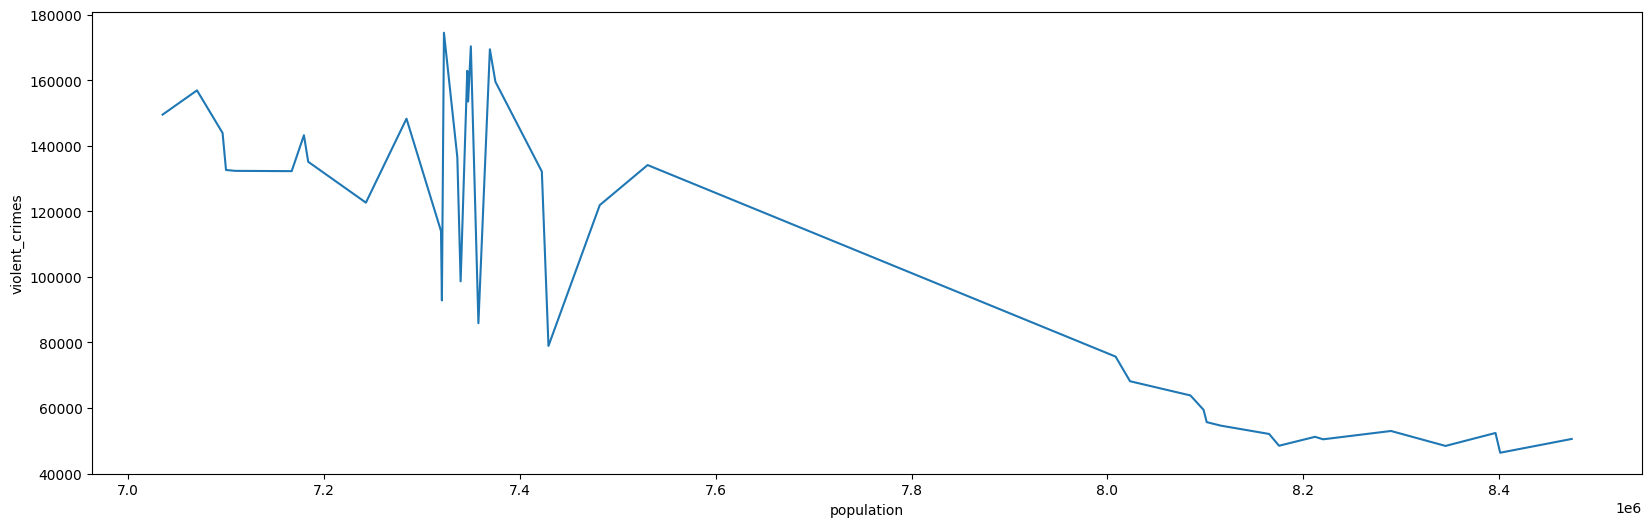

In [159]:
max = df[df['report_year']==1975]['population'].max()
biggest_town = df[df['population']==max].agency_jurisdiction.values[0]
biggest_town_df = df[df['agency_jurisdiction']==biggest_town]
plt.figure(figsize=(20, 6))
sns.lineplot(x='population', y='violent_crimes', data=biggest_town_df)
plt.show()

Взглянув на таблицу, сделайте вывод о данных.

В городе с наименьшим населением на 1975 год, наблюдается рост криминала с увеличением населения.

В городе же с наибольшим населением на 1975 год, наблюдается падение уровня криминала с ростом населения.

Получите сводную таблицу частот преступлений в различных городах. Посмотрите на их изменение в самом крупном/мелком городе, в городах с наибольшей наименьшей преступностью.

In [195]:
pivot_table = pd.pivot_table(df, values=['violent_crimes','population'],index='agency_jurisdiction',aggfunc='mean', fill_value=0)
pivot_table




,population,violent_crimes
agency_jurisdiction,,
"Albuquerque, NM",420075.050,4394.400
"Arlington, TX",275656.225,1658.375
"Atlanta, GA",438862.475,10596.675
"Aurora, CO",242877.800,1898.675
"Austin, TX",550553.350,2802.850
...,...,...
"Tucson, AZ",439971.825,3721.125
"Tulsa, OK",378411.525,3795.200
"Virginia Beach, VA",376337.700,835.400


from matplotlib import pyplot as plt
pivot_table['population'].plot(kind='hist', bins=20, title='population')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pivot_table['violent_crimes'].plot(kind='hist', bins=20, title='violent_crimes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pivot_table.plot(kind='scatter', x='population', y='violent_crimes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pivot_table['population'].plot(kind='line', figsize=(8, 4), title='population')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
pivot_table['violent_crimes'].plot(kind='line', figsize=(8, 4), title='violent_crimes')
plt.gca().spines[['top', 'right']].set_visible(False)

In [196]:
max_population = pivot_table[pivot_table['population'] == pivot_table['population'].max()]
min_population = pivot_table[pivot_table['population'] == pivot_table['population'].min()]
max_population

,population,violent_crimes
agency_jurisdiction,,
"New York City, NY",7630666.95,105329.9


In [193]:
min_population

,population,violent_crimes
agency_jurisdiction,,
"Salt Lake City, UT",177091.55,1268.675


In [198]:
max_crimes = pivot_table[pivot_table['violent_crimes'] == pivot_table['violent_crimes'].max()]
min_crimes = pivot_table[pivot_table['violent_crimes'] == pivot_table['violent_crimes'].min()]
max_crimes


,population,violent_crimes
agency_jurisdiction,,
"New York City, NY",7630666.95,105329.9


In [199]:
min_crimes

,population,violent_crimes
agency_jurisdiction,,
"Fairfax County, VA",812454.225,828.125


Постройте графики

In [ ]:
# Я не знаю какие тут надо графики построить :C

Можно ли сказать, что наименьшие по размеру/уровню преступности города обходят общие тренды?

Но вернемся к проверке линейной зависимости. Будем рассматривать зависимость числа всех преступлений от размера населения городов.

<Axes: xlabel='population', ylabel='violent_crimes'>

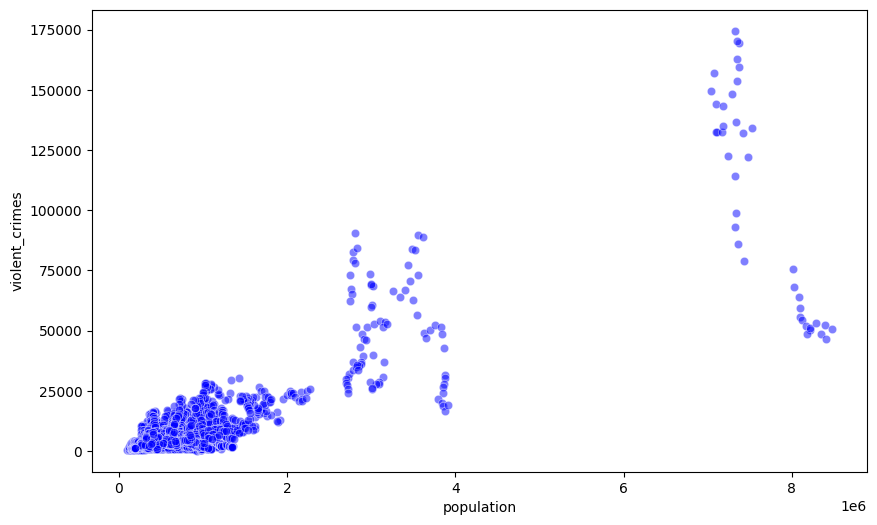

In [285]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='population', y='violent_crimes', data=df, color='blue', alpha=0.5)

Воспользуйте regplot из пакета Seaborn

<Axes: xlabel='population', ylabel='violent_crimes'>

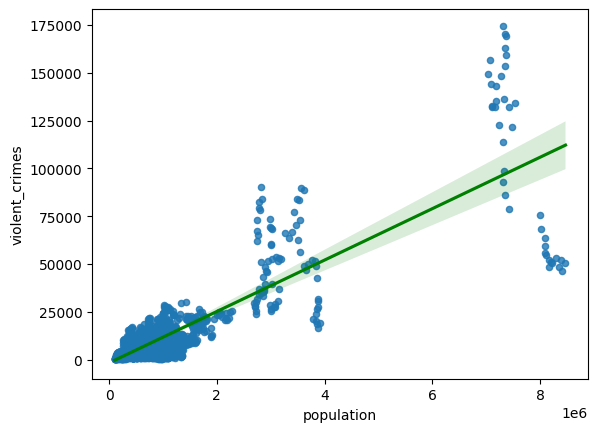

In [208]:
sns.regplot(x='population', y='violent_crimes', data=df, scatter_kws={'s': 20}, line_kws={'color': 'green'})

Посчитайте корреляцию пирсона

In [209]:
correlation_coefficient = df['population'].corr(df['violent_crimes'])

In [210]:
correlation_coefficient

0.8481114343724743

Есть ли корреляция между частотами преступления и числа городов?
А если посмотреть на города с населением больше 1.5 млн?
Расммотрите их отдельно ниже

In [261]:
cities_more_1_5m=df.groupby('agency_jurisdiction')['population'].mean()>1500000
cities_more_1_5m = cities_more_1_5m.index[cities_more_1_5m]
cities_more_1_5m
target_cities = df[df['agency_jurisdiction'].isin(cities_more_1_5m)]
target_cities.reset_index(drop=True,inplace=True)
set(target_cities['agency_jurisdiction'].values)


{'Chicago, IL',
 'Houston, TX',
 'Los Angeles, CA',
 'New York City, NY',
 'Philadelphia, PA'}

In [262]:
target_cities.head(6)

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,ILCPD00,"Chicago, IL",3150000.0,37160.0,818.0,1657.0,12514.0,22171.0,12.0,0.011797,0.000260,0.000526,0.003973,0.007038
1,1975,TXHPD00,"Houston, TX",1372342.0,8924.0,347.0,588.0,1567.0,6422.0,12.0,0.006503,0.000253,0.000429,0.001142,0.004680
2,1975,CA01942,"Los Angeles, CA",2729878.0,30405.0,554.0,1768.0,13493.0,14590.0,12.0,0.011138,0.000203,0.000648,0.004943,0.005345
3,1975,NY03030,"New York City, NY",7422506.0,132182.0,1645.0,3866.0,43481.0,83190.0,12.0,0.017808,0.000222,0.000521,0.005858,0.011208
4,1975,PAPEP00,"Philadelphia, PA",1883253.0,16332.0,435.0,716.0,4776.0,10405.0,12.0,0.008672,0.000231,0.000380,0.002536,0.005525
5,1976,ILCPD00,"Chicago, IL",3134499.0,30640.0,814.0,1179.0,11070.0,17577.0,12.0,0.009775,0.000260,0.000376,0.003532,0.005608


In [263]:
correlation_coefficient_target_cities = df['population'].corr(df['violent_crimes'])
correlation_coefficient_target_cities

0.8481114343724743

Какой вывод можно сделать? Если тренды для преступности? Можно ли это достоверно утверждать?

Можно сделать вывод о том, что уровень преступности зависит от количества населения. Коэффициенты корреляции что для всех городов, что для городов с населением выше 1.5млн человек равны.

## Проверка на нормальность частот преступлений

Посмотрим на распределение частот преступлений в различных городах. Вряд ли стоит ожидать, что распределение окажется нормальным, но ради эксперимента, можно попробовать.

<Axes: xlabel='crimes_percapita', ylabel='Count'>

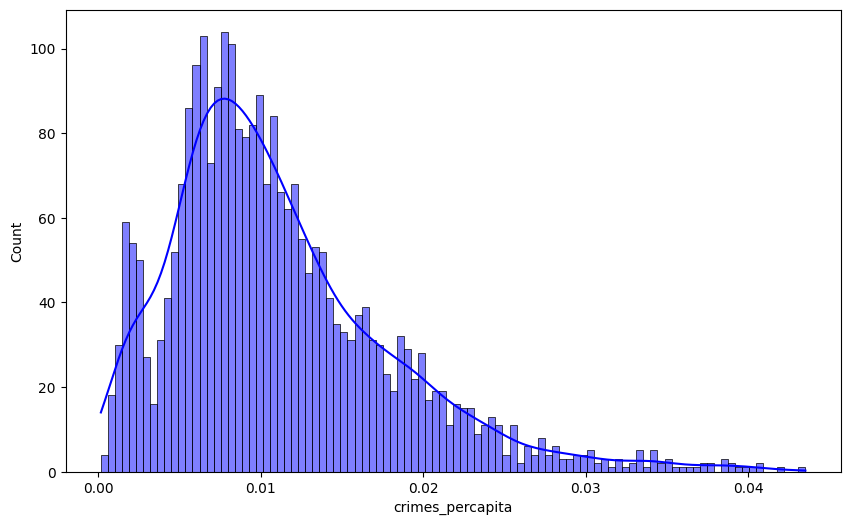

In [273]:
plt.figure(figsize=(10, 6))
sns.histplot(df['crimes_percapita'], bins=100, kde=True, color='blue')

In [265]:
df.head(5)

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,0.008325,0.000105,0.000632,0.004727,0.002861
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,0.002472,0.000045,0.000249,0.001174,0.001005
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,0.016374,0.000377,0.000903,0.007171,0.007923
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,0.005238,0.000060,0.000377,0.003335,0.001466
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,0.004045,0.000110,0.000633,0.001541,0.001761


<Axes: xlabel='homicides_percapita', ylabel='Count'>

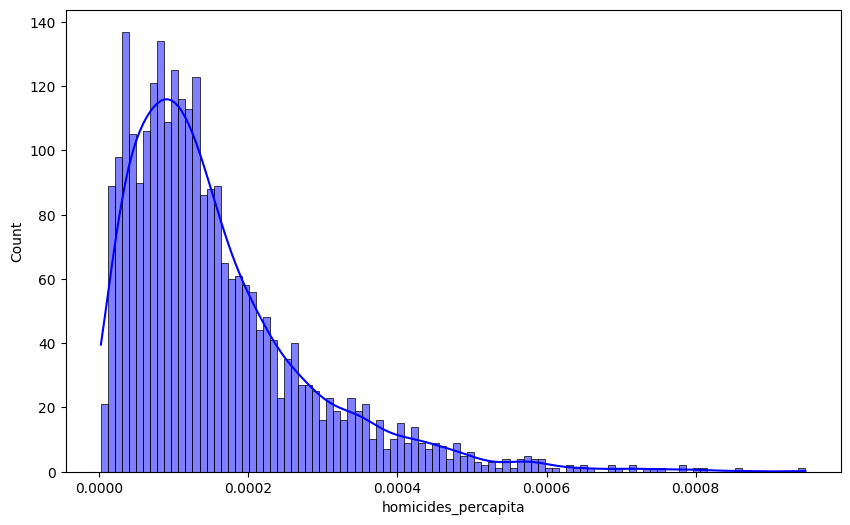

In [275]:
plt.figure(figsize=(10, 6))
sns.histplot(df['homicides_percapita'], bins=100, kde=True, color='blue')

<Axes: xlabel='rapes_percapita', ylabel='Count'>

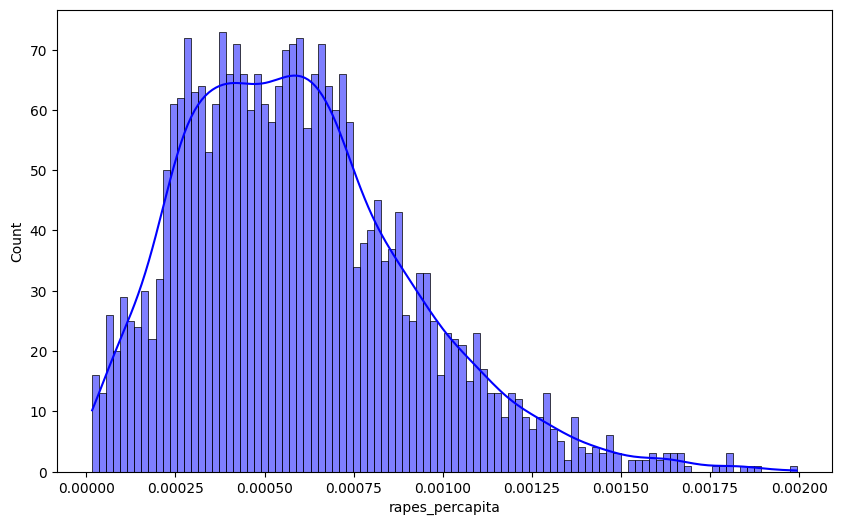

In [274]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rapes_percapita'], bins=100, kde=True, color='blue')

<Axes: xlabel='assaults_percapita', ylabel='Count'>

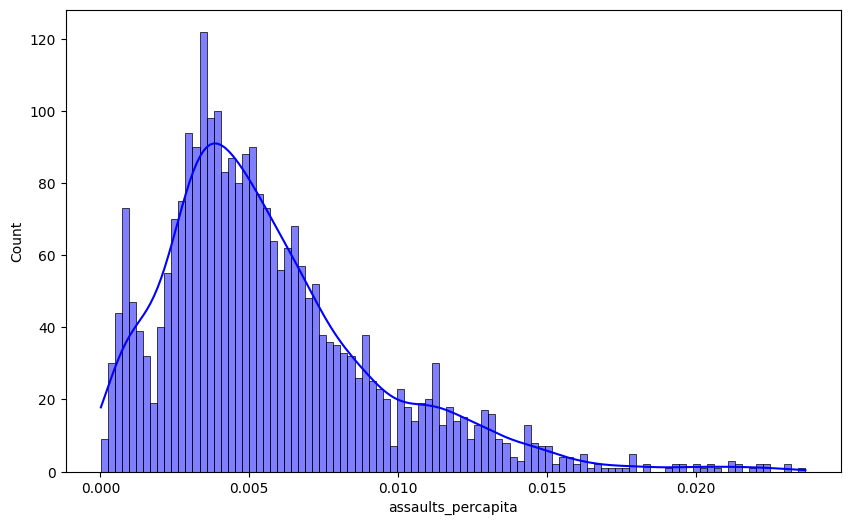

In [278]:
plt.figure(figsize=(10, 6))
sns.histplot(df['assaults_percapita'], bins=100, kde=True, color='blue')

<Axes: xlabel='robberies_percapita', ylabel='Count'>

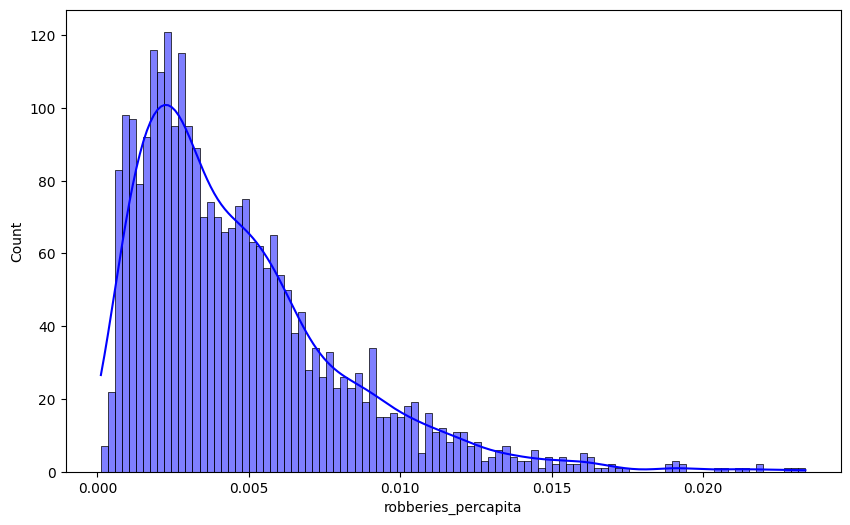

In [277]:
plt.figure(figsize=(10, 6))
sns.histplot(df['robberies_percapita'], bins=100, kde=True, color='blue')

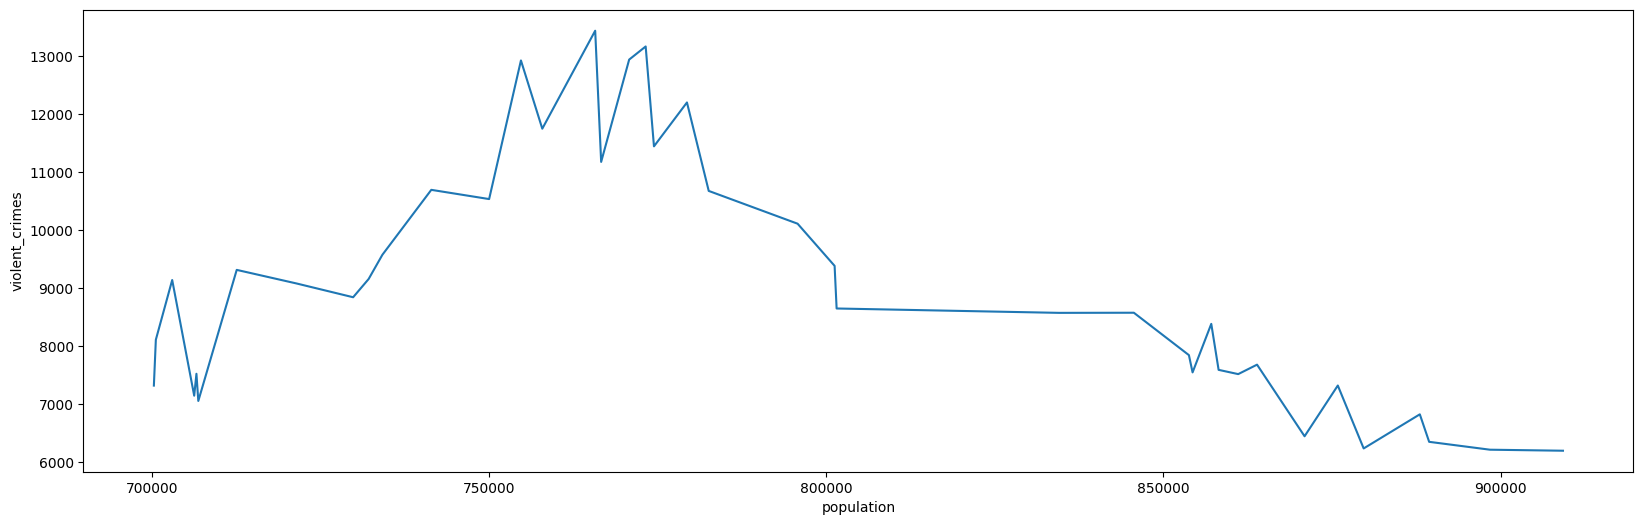

In [302]:
population = df.groupby('report_year')['population'].mean()
population
violent_crimes = df.groupby('report_year')['violent_crimes'].mean()
violent_crimes
mean_stats = pd.DataFrame(population).join(violent_crimes,how='left')
plt.figure(figsize=(20, 6))
sns.lineplot(x='population', y='violent_crimes', data=mean_stats)
plt.show()


Попробуйте также посмотреть по различным преступлениям.

Проведите дополнительный анализ, визуализируйте различные признаки и зависимости между ними.